<a href="https://colab.research.google.com/github/Naveed2204016/Personal_Practise/blob/main/2025_Iyatomi_Lab_Competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow
from tensorflow import keras

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c 2025-iyatomi-lab-competition

  0% 0.00/66.5M [00:00<?, ?B/s]
100% 66.5M/66.5M [00:00<00:00, 1.76GB/s]


In [ ]:
import zipfile
zip_ref=zipfile.ZipFile('/content/2025-iyatomi-lab-competition','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [ ]:
conv_base=VGG16(weights='imagenet',include_top=False,input_shape=(150,150,3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras.layers import Dropout
model=Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(11,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │         2,827 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,814,923 (64.14 MB)

 Trainable params: 16,814,923 (64.14 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
conv_base.trainable=False

In [ ]:
!ls /content/

2025-iyatomi-lab-competition.zip  sample_data		 test
kaggle.json			  sample_submission.csv  train


In [ ]:

from tensorflow.keras.utils import image_dataset_from_directory


In [ ]:
train_dir = "/content/train"
test_dir = "/content/test"
IMG_SIZE = (150, 150)
BATCH_SIZE = 32

In [ ]:
train_dataset = image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='categorical',
    validation_split=0.2,
    subset='training',
    seed=42,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)

val_dataset = image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='categorical',
    validation_split=0.2,
    subset='validation',
    seed=42,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)


Found 1335 files belonging to 11 classes.
Using 1068 files for training.
Found 1335 files belonging to 11 classes.
Using 267 files for validation.


In [ ]:
test_dataset = image_dataset_from_directory(
    test_dir,
    labels=None,
    label_mode=None,
    shuffle=False,             # important: predictions must match filenames
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)


Found 573 files.


In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_dataset,epochs=15,validation_data=val_dataset)

Epoch 1/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - accuracy: 0.6465 - loss: 1.2072 - val_accuracy: 0.5356 - val_loss: 1.9199
Epoch 2/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/step - accuracy: 0.6571 - loss: 1.0145 - val_accuracy: 0.4981 - val_loss: 1.7926
Epoch 3/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/step - accuracy: 0.7276 - loss: 0.7548 - val_accuracy: 0.5356 - val_loss: 1.7071
Epoch 4/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step - accuracy: 0.7196 - loss: 0.8784 - val_accuracy: 0.5543 - val_loss: 1.7744
Epoch 5/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 145ms/step - accuracy: 0.7255 - loss: 0.8268 - val_accuracy: 0.5318 - val_loss: 2.0650
Epoch 6/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - accuracy: 0.7238 - loss: 0.8517 - val_accuracy: 0.5581 - val_loss: 1.7715
Epoch 7/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 132ms/step - accuracy: 0.7119 - loss: 0.8336 - val_accuracy: 0.5281 - val_loss: 1.8893
Epoch 8/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.6915 - loss: 0.8857 - val_accuracy: 0.

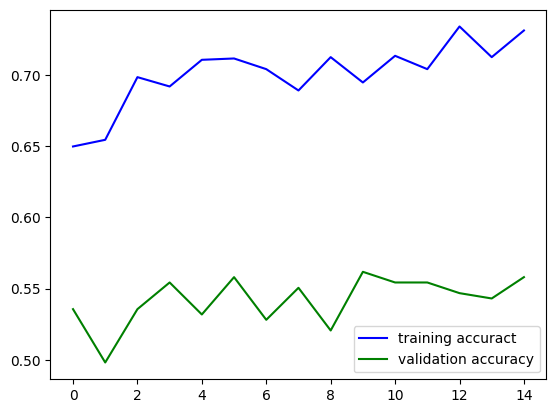

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'],color='blue',label='training accuract')
plt.plot(history.history['val_accuracy'],color='green',label='validation accuracy')
plt.legend()
plt.show()

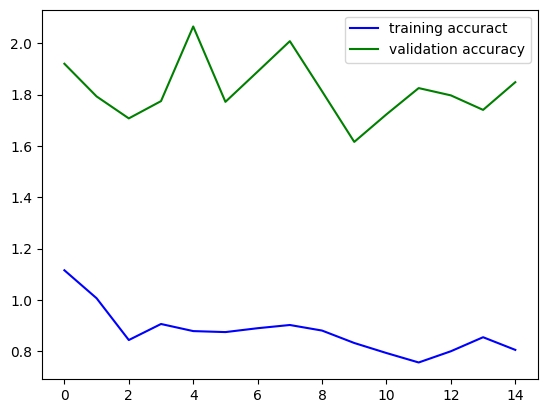

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'],color='blue',label='training accuract')
plt.plot(history.history['val_loss'],color='green',label='validation accuracy')
plt.legend()
plt.show()

In [ ]:

predictions = model.predict(test_dataset, verbose=1)

predicted_indices = np.argmax(predictions, axis=1)


18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 509ms/step


In [ ]:
predicted_indices

array([ 0,  5,  4,  7,  0,  8, 10,  4,  9,  5,  5,  5,  6,  5,  9,  5,  7,
        6,  8, 10,  9,  0,  7, 10,  3,  3,  7, 10,  6,  2,  5,  0,  2,  7,
        8,  8,  9,  5,  9,  8,  2,  8,  1,  2,  9, 10,  6,  1, 10,  3, 10,
        5, 10,  6,  4,  1, 10,  8, 10,  6,  9,  5,  0,  0,  4,  1,  2,  4,
        2,  0,  0,  7,  4,  6,  7,  1,  4,  1,  9,  0, 10,  3,  5,  0,  6,
        5,  1,  0,  4, 10,  2,  5,  9,  4,  7,  1,  5,  8, 10, 10,  4,  2,
        7,  8,  9,  1,  8,  7,  4,  8,  1,  7,  7,  1,  5,  6,  0,  0,  1,
        6,  8,  2,  0,  4,  5,  0,  0, 10,  5, 10,  7,  3,  5,  7,  5,  5,
        6,  3,  8,  0,  0, 10,  8,  3, 10, 10,  7,  8,  7,  9,  8,  0,  5,
        6,  0,  1, 10,  4,  3,  3,  3, 10,  7,  6,  7,  0,  7,  4,  5,  8,
        5,  2,  3,  7,  0,  4,  0,  4,  1,  7,  0,  5,  9,  3,  9, 10,  5,
        1,  6,  9,  2,  4,  4,  5,  6,  9,  4,  4,  2,  6,  4,  9,  6,  1,
        5,  9,  2,  1,  6,  8,  0,  1,  8,  6,  9,  0,  6, 10,  9,  5,  3,
        2, 10,  0,  1,  0

In [ ]:
class_names=['Afghan_hound','African_hunting_dog','American_Staffordshire_terrier','Eskimo_dog','Siberian_husky','Staffordshire_bullterrier',
             'chow','malamute','miniature_poodle','standard_poodle','toy_poodle']
predicted_labels = [class_names[i] for i in predicted_indices]


In [ ]:

import os

test_filenames = [os.path.basename(path) for path in test_dataset.file_paths]


In [ ]:
import pandas as pd

submission = pd.DataFrame({
    'id': test_filenames,
    'label': predicted_labels
})

submission.to_csv('submission.csv', index=False)
